In [75]:
import pandas as pd
from datetime import datetime
import sys, os, requests
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [3]:
sys.path.append('/home/wilder/myprojects/sierra-precip/src')

from preprocessing import DataProcessed
from pipelines import create_pipe1

In [4]:
df = DataProcessed()
df.pull()

Created engine: Engine(mysql+pymysql://)


In [5]:
df.remove_seasonality();


,NINO12,ANOM,NINO3,ANOM1,NINO4,ANOM2,NINO34,ANOM3,pdo_value,ao_value,...,SNOTEL724_CA_SNTL_SWE,SNOTEL771_CA_SNTL_SWE,SNOTEL778_CA_SNTL_SWE,SNOTEL784_CA_SNTL_SWE,SNOTEL1258_CA_SNTL_SWE,SNOTEL1052_CA_SNTL_SWE,SNOTEL809_CA_SNTL_SWE,SNOTEL834_CA_SNTL_SWE,SNOTEL846_CA_SNTL_SWE,SNOTEL848_CA_SNTL_SWE
1985-01-01,23.59,-0.93,24.28,-1.39,27.39,-0.83,25.26,-1.30,0.87,-2.806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-02-01,24.79,-1.30,25.24,-1.14,27.53,-0.57,25.81,-0.92,0.48,-1.440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-03-01,25.66,-0.95,26.21,-0.96,27.23,-0.99,26.35,-0.89,-0.34,0.551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-04-01,24.30,-1.43,26.64,-0.94,27.42,-1.09,26.71,-1.10,-0.52,0.652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-05-01,22.72,-1.89,25.99,-1.22,27.71,-1.08,26.81,-1.08,-0.87,-0.432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,25.81,0.08,28.19,0.62,29.32,0.81,28.61,0.81,-2.12,0.465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-01,23.93,-0.68,27.19,-0.03,29.49,0.70,28.19,0.31,-2.99,-0.048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-01,22.52,-0.65,26.51,-0.14,29.49,0.65,27.95,0.24,-3.16,0.136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,21.42,-0.41,25.79,-0.08,29.39,0.60,27.51,0.21,-2.99,0.587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.single_target(16);

,NINO12,ANOM,NINO3,ANOM1,NINO4,ANOM2,NINO34,ANOM3,pdo_value,ao_value,SNOTEL428_CA_SNTL_SWE
1985-01-01,23.59,-0.93,24.28,-1.39,27.39,-0.83,25.26,-1.30,0.87,-2.806,NaN
1985-02-01,24.79,-1.30,25.24,-1.14,27.53,-0.57,25.81,-0.92,0.48,-1.440,NaN
1985-03-01,25.66,-0.95,26.21,-0.96,27.23,-0.99,26.35,-0.89,-0.34,0.551,NaN
1985-04-01,24.30,-1.43,26.64,-0.94,27.42,-1.09,26.71,-1.10,-0.52,0.652,NaN
1985-05-01,22.72,-1.89,25.99,-1.22,27.71,-1.08,26.81,-1.08,-0.87,-0.432,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,25.81,0.08,28.19,0.62,29.32,0.81,28.61,0.81,-2.12,0.465,NaN
2024-05-01,23.93,-0.68,27.19,-0.03,29.49,0.70,28.19,0.31,-2.99,-0.048,NaN
2024-06-01,22.52,-0.65,26.51,-0.14,29.49,0.65,27.95,0.24,-3.16,0.136,NaN
2024-07-01,21.42,-0.41,25.79,-0.08,29.39,0.60,27.51,0.21,-2.99,0.587,NaN


In [7]:
df.shift_for_correlation(df.data.columns[-1]).dropna();

In [15]:
df.seperate_y()

In [17]:
df.X

,NINO12,ANOM,NINO3,ANOM1,NINO4,ANOM2,NINO34,ANOM3,pdo_value,ao_value
1987-08-01,24.30,-0.93,25.45,-0.17,28.40,0.31,26.95,0.22,0.87,-0.527
1987-09-01,22.72,-1.30,24.73,-0.36,28.15,-0.07,27.29,0.06,0.48,0.530
1987-10-01,21.83,-0.95,24.24,-0.08,27.91,-0.60,27.26,-0.55,-0.34,0.486
1987-11-01,20.46,-1.43,24.04,-0.05,28.07,-0.72,26.56,-1.32,-0.52,-0.115
1987-12-01,19.60,-1.89,24.11,-0.10,27.89,-0.95,26.01,-1.70,-0.87,-0.188
...,...,...,...,...,...,...,...,...,...,...
2020-09-01,24.07,-0.49,26.14,2.08,27.81,-0.41,26.69,-0.55,-0.09,0.465
2020-10-01,22.48,-0.75,25.36,2.06,28.33,-0.18,27.24,-0.57,-0.72,-0.048
2020-11-01,21.54,-0.84,25.29,1.87,28.73,-0.06,27.56,-0.32,-0.82,0.136
2020-12-01,20.67,-0.54,25.85,1.47,28.88,0.04,27.67,-0.04,-0.46,0.587


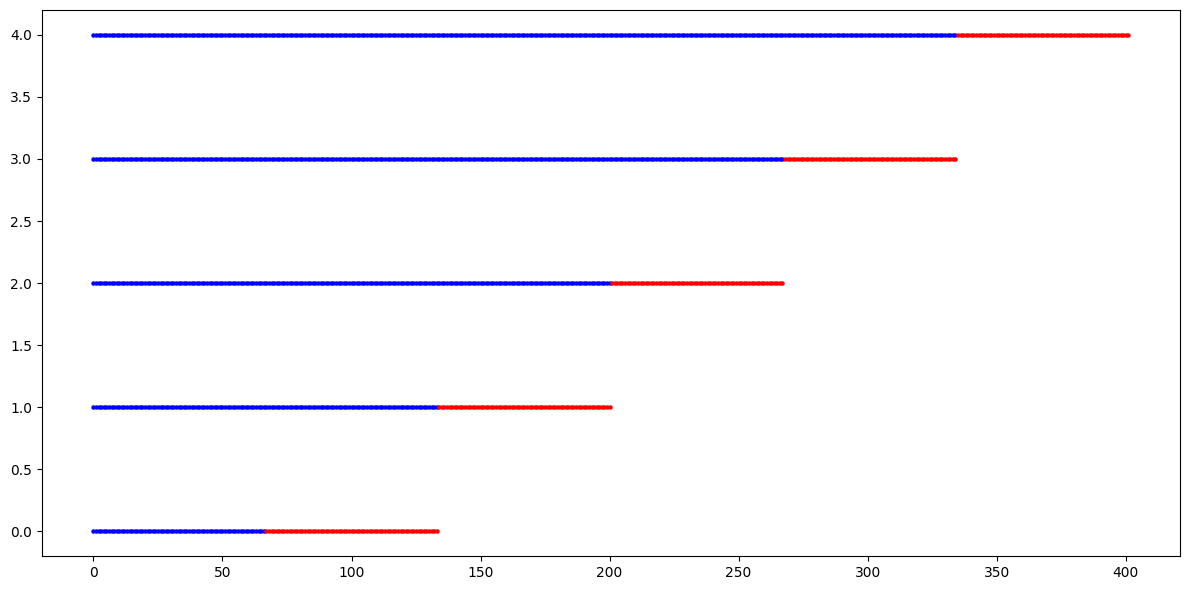

In [37]:
from sklearn.model_selection import TimeSeriesSplit

tscv=TimeSeriesSplit(n_splits=5)

X_index = np.arange(len(df.X))

plt.figure(figsize=(12,6))

train_sets = []
test_sets = []

for i, (train_index, test_index) in enumerate(tscv.split(df.X)):
    train_sets.append((df.X.iloc[train_index], df.y.iloc[train_index]))
    test_sets.append((df.y.iloc[test_index], df.y.iloc[test_index]))

    
    plt.scatter(X_index[train_index], [i]*len(train_index), c='blue', s=5)
    plt.scatter(X_index[test_index], [i]*len(test_index), c='red', s=5)
    
plt.tight_layout()
plt.show()

In [58]:
X_train, y_train = train_sets[0]

In [11]:
pipe = create_pipe1()

In [12]:
df1.shape[0]

402

In [62]:
sys.path.append('/home/wilder/myprojects/sierra-precip/ml')

from model import LSTMModel


In [63]:
input_size = 10
hidden_size = 50
num_layers = 2
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)

In [78]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [79]:
tensor = torch.from_numpy(df.data.values)

dataset = TensorDataset(tensor)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [86]:
dataset.tensors

(tensor([[24.3000, -0.9300, 25.4500,  ...,  0.8700, -0.5270,  6.1660],
         [22.7200, -1.3000, 24.7300,  ...,  0.4800,  0.5300,  5.3826],
         [21.8300, -0.9500, 24.2400,  ..., -0.3400,  0.4860,  4.4181],
         ...,
         [21.5400, -0.8400, 25.2900,  ..., -0.8200,  0.1360,  7.3583],
         [20.6700, -0.5400, 25.8500,  ..., -0.4600,  0.5870,  7.5854],
         [20.6000, -0.6900, 26.1200,  ..., -0.6600,  1.2840,  8.4312]],
        dtype=torch.float64),)

In [80]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagate the loss
    optimizer.step()  # Update weights
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


AttributeError: 'DataFrame' object has no attribute 'device'

In [2]:
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.tuner import Tuner
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer